In [1]:
import random
import sys
import time
import traceback
import numpy as np
import pandas as pd
import scipy.stats as spstats
import elp_networks.algorithms as elpalg
import elp_nkmodel as elpnk
import logbook
import net
import simulator
import strategy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 9
K = 7
D = 20
rewire = 0.9
model = elpnk.NK(N, K)
steps = 128
sample = 3

# Generate network from NK structure
edges_node_loc, nodes = net.nk_to_affiliation(model, D)
net.rewire_affiliation(model, edges_node_loc, rewire)
edges = net.affiliation_to_node(edges_node_loc)

# Create strategy
strat = strategy.LocalBestNeighborIndividual(model, nodes, edges_node_loc, sample)

# Run simulator
sim = simulator.Simulator(model, nodes, edges, strat)
sim.run(steps)

In [3]:
states = np.zeros((2**N,steps))

In [4]:
loci = sim.states[0].keys()
for t in range(steps):
    for l in loci:
        s = sim.states[t][l]
        n = sum([b << i for i, b in enumerate(s)])
        states[n, t] += 1

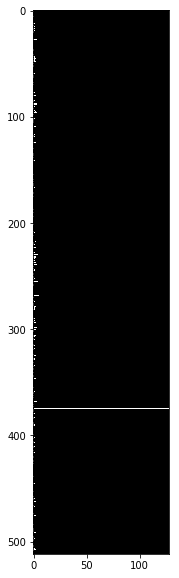

In [5]:
import matplotlib
plt.figure(figsize=(10,10))
plt.imshow(np.ceil(states / len(loci)), cmap=matplotlib.cm.gray)

In [6]:
s = sim.states[0][0]

In [12]:
progress = [[] for l in loci]
values = [[] for l in loci]
for t in range(8):
    for l in loci:
        s = sim.states[t][l]
        n = sum([b << i for i, b in enumerate(s)])
        progress[l].append(n)
        values[l].append(sim.values[t][l])

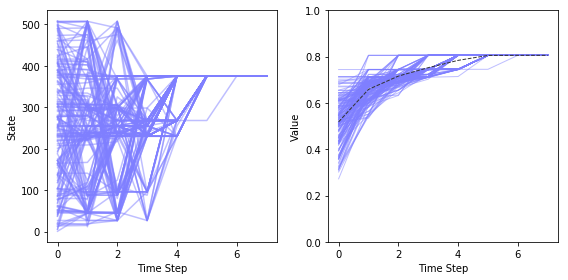

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
for y in progress:
    plt.plot(y, color="#7f7fff", alpha=0.5)
plt.xlabel('Time Step')
plt.ylabel('State')
plt.subplot(1,2,2)
for y in values:
    plt.plot(y, color="#7f7fff", alpha=0.5, linewidth=1)
plt.plot(sim.mean_values[0:8], '--', color="#333333", linewidth=1)
plt.ylim([0,1])
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.tight_layout()